Import dataset

In [252]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186).data.original
color = wine_quality['color'] #0 red 1 white
color = np.where(color == 'red', 0, 1) # convert to numerical values
y = wine_quality['quality']
X = wine_quality.drop(columns=['quality', 'color'])
print(len(X), "samples")

6497 samples


No missing values

In [253]:
X.isnull().sum().sum()

0

In [254]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [255]:
# Percentage of white and red wines
white_percentage = np.sum(color == 1) / len(color) * 100
red_percentage = np.sum(color == 0) / len(color) * 100
print(f"Percentage of white wines: {white_percentage:.2f}%")
print(f"Percentage of red wines: {red_percentage:.2f}%")

Percentage of white wines: 75.39%
Percentage of red wines: 24.61%


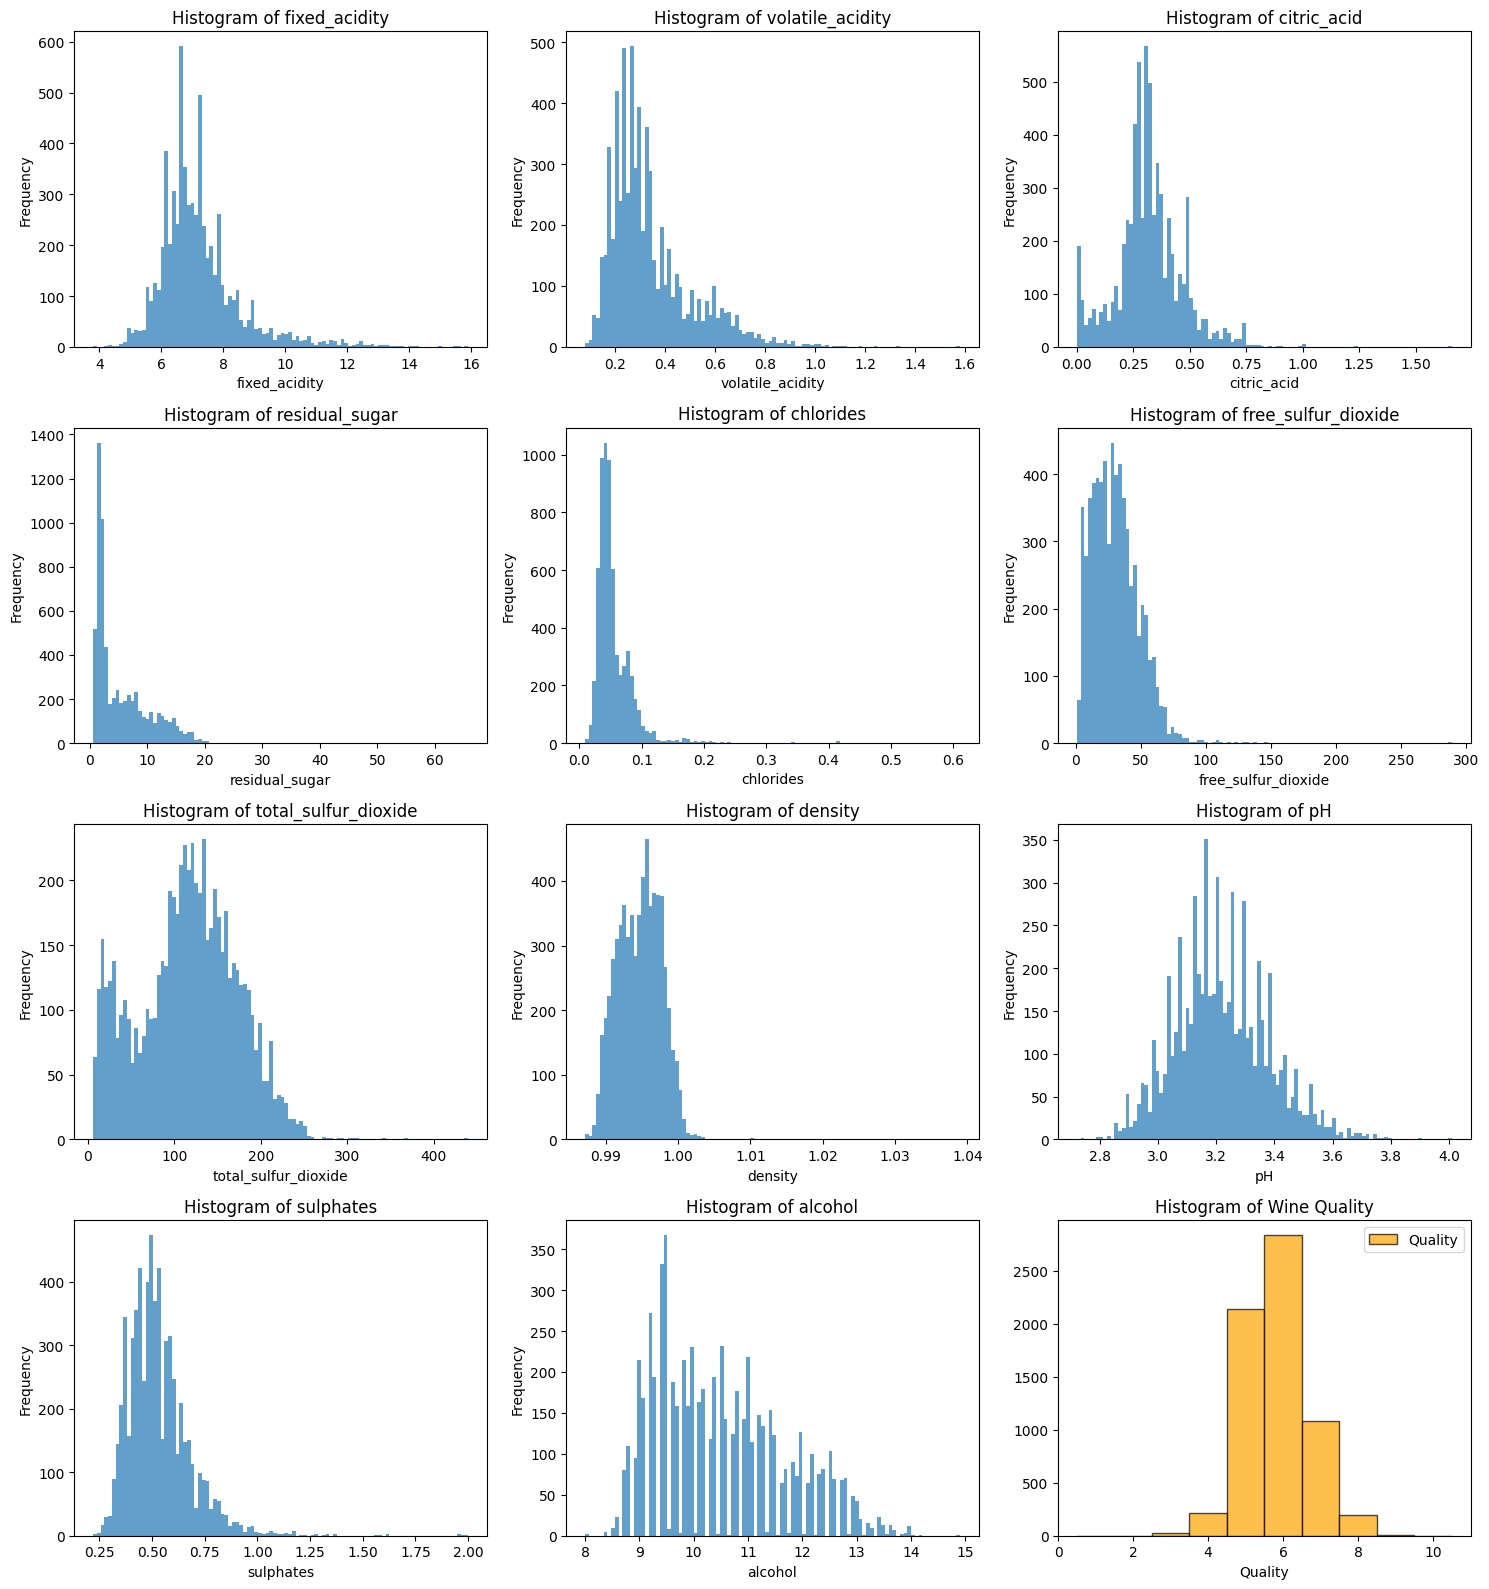

In [256]:
# Plot histogram for each feature and quality in a grid layout
def plot_histograms(X, y):
    num_features = X.shape[1]
    num_rows = (num_features + 2) // 3  # 3 plots per row
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
    
    for i, feature in enumerate(X.columns):
        ax = axes[i // 3, i % 3]
        ax.hist(X[feature], bins=100, alpha=0.7, label='Feature')
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
    # Add quality distribution
    ax = axes[-1, -1]  # Last subplot
    # Histogram binned by discrete quality values between 0 and 10
    ax.hist(y, bins=np.arange(0.5, 11.5, 1), alpha=0.7, color='orange', label='Quality', edgecolor='black')
    ax.set_title('Histogram of Wine Quality')
    ax.set_xlabel('Quality')
    
    plt.tight_layout()
    plt.legend()
    plt.show()
plot_histograms(X, y)

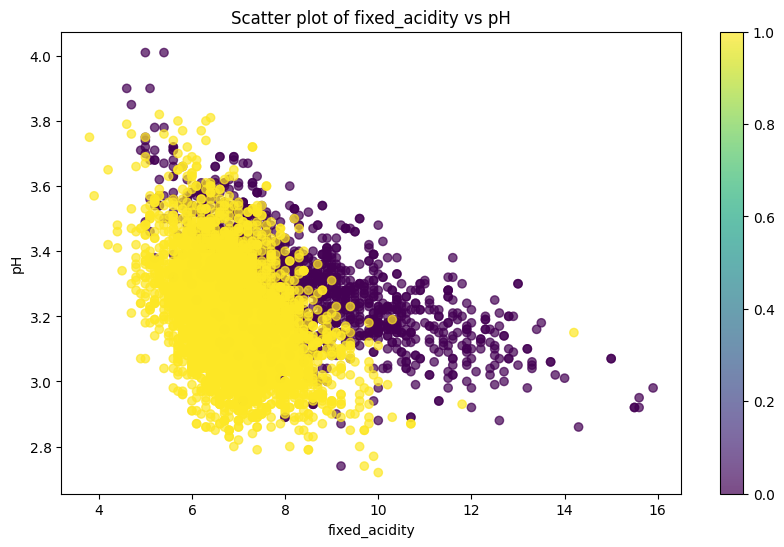

In [257]:
def scatter_plot(X, y, feature1, feature2, color_feature):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[feature1], X[feature2], c=color_feature, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Scatter plot of {feature1} vs {feature2}')
    plt.show()

scatter_plot(X, y, 'fixed_acidity', 'pH', color)

In [258]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

C:\Users\Çağan\AppData\Local\Temp\ipykernel_9044\344062.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


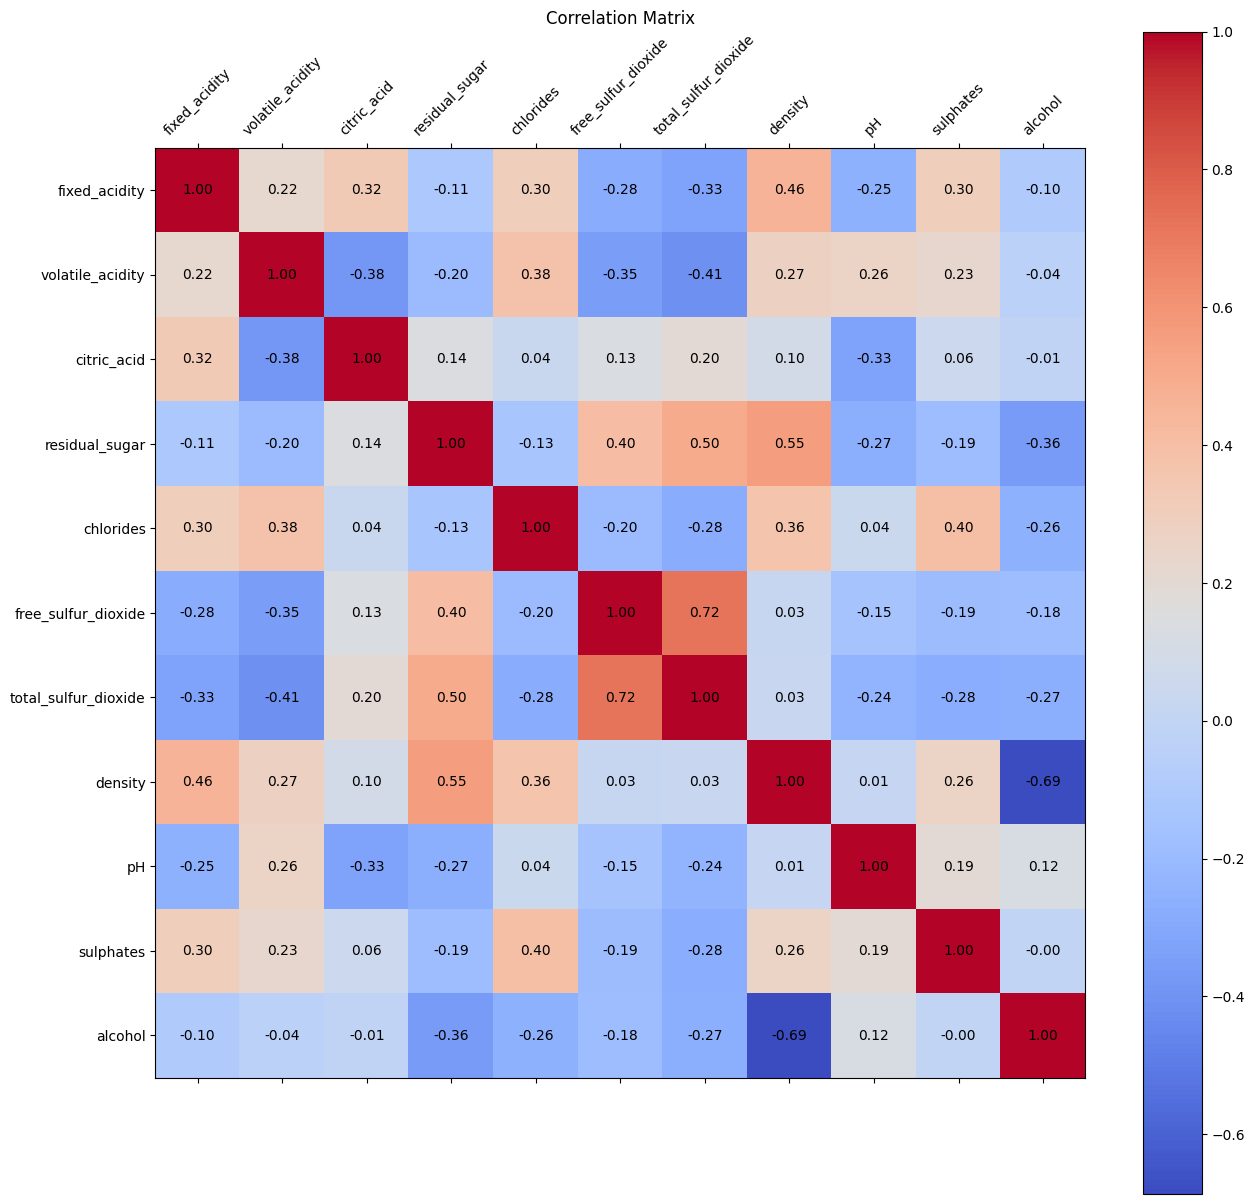

In [259]:
# Plot correlation matrix also containing quality and color and fit the names and display values on the cells
def plot_correlation_matrix(X):
    df = pd.DataFrame(X)
    corr = df.corr()
    
    plt.figure(figsize=(15, 15))
    cax = plt.matshow(corr, cmap='coolwarm', fignum=1)
    plt.colorbar(cax)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
plot_correlation_matrix(X_scaled)
#save the correlation matrix to a png file

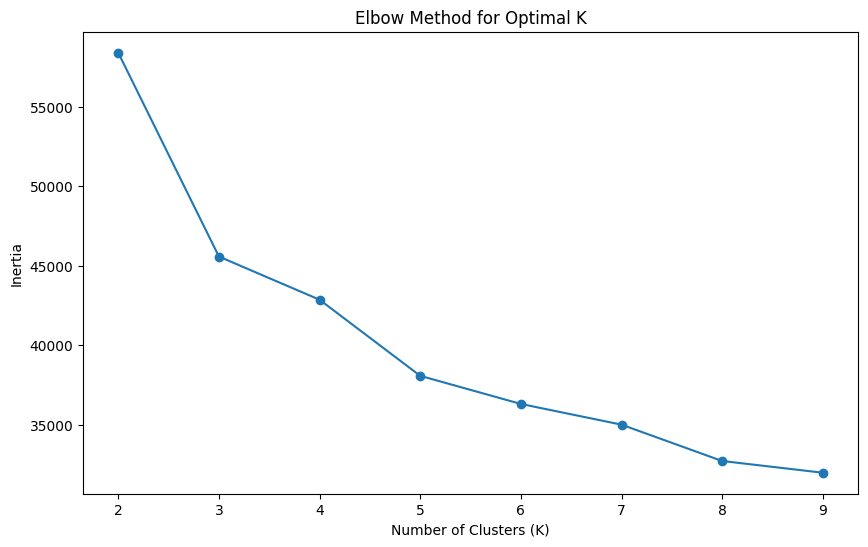

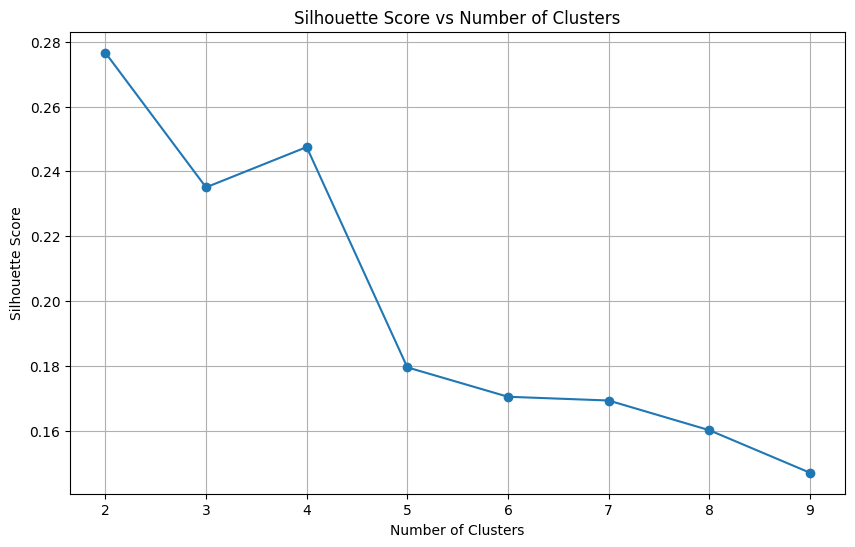

In [260]:
from sklearn.cluster import KMeans
k_range = range(2, 10)
#Calculate elbow method to find optimal number of clusters
inertia = []
bics = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=35235)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    #Calculate BIC
    bic = kmeans.inertia_ / len(X_scaled) + (k * np.log(len(X_scaled)))
    bics.append(bic)
plt.figure(figsize=(10, 6))
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.plot(k_range, inertia, marker='o')

# Silhouette score to find optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=32523)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid()
plt.show()

Explained variance by PCA components: 0.5021540614343645


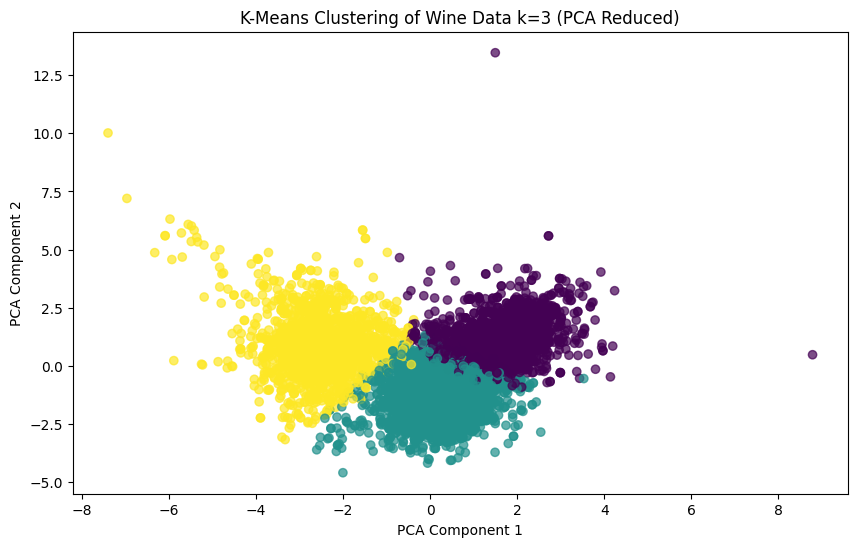

In [261]:
#Choose k=3
kmeans = KMeans(n_clusters=3, random_state=31531362)
assigned_clusters = kmeans.fit_predict(X_scaled)
# Do PCA down to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f'Explained variance by PCA components: {np.sum(pca.explained_variance_ratio_)}')
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=assigned_clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of Wine Data k=3 (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [262]:
# Compare cluster average values: (features, quality and color) to just splitting by color
cluster_means = pd.DataFrame(X_scaled,columns=X_scaled.columns).groupby(assigned_clusters).mean()
y_df = pd.DataFrame(y, columns=["quality"])
cluster_means['quality'] = pd.DataFrame(y_df, columns=["quality"]).groupby(assigned_clusters).mean()
cluster_means['color'] = pd.DataFrame(color, columns=["color"]).groupby(assigned_clusters).mean()

In [263]:
print("Cluster Means:")
cluster_means

Cluster Means:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.184454,-0.351858,0.277935,1.206545,-0.089738,0.850474,0.959136,0.760603,-0.392890,-0.259356,-0.796582,5.622481,0.997879
1,-0.348602,-0.403861,-0.003842,-0.435570,-0.441229,-0.090442,0.036565,-0.848611,-0.037438,-0.282450,0.565673,6.060305,0.981113
2,0.878820,1.181705,-0.321776,-0.603261,0.942170,-0.835555,-1.204823,0.707225,0.536082,0.842172,-0.128592,5.591965,0.034526


- 0 Sweet & Preserved
- 1 High Alcohol & Smooth
- 2 Sharp & Saline

In [268]:
import statsmodels.api as sm
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd

Xc = sm.add_constant(X_scaled)
model = sm.OLS(y, Xc)
results = model.fit()

In [269]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sat, 12 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:52:49   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8184      0.009    637.785      0.000       5.800       5.836
fixed_acidity            0.0877      0.020      4.346      0.000       0.048       0.127
volatile_acidity        -0.2186      0.013    -17.162      0.000      -0.244      -0.194
citric_acid             -0.0159      0.012     -1.377      0.168      -0.039       0.007
residual_sugar           0.2072      0.025      8.449      0.000       0.159       0.255
chlorides               -0.0169      0.012     -1.454      0.146      -0.040       0.006
free_sulfur_dioxide      0.1060      0.013      7.948      0.000       0.080       0.132
total_sulfur_dioxide    -0.1402      0.016     -8.969      0.000      -0.171      -0.110
density                 -0.1648      0.036     -4.529      0.000      -0.236      -0.093
pH                       0.0706      0.015      4.861      0.000       0.042       0.099
sulphates                0.1143      0.011     10.092      0.000       0.092       0.137
alcohol                  0.3185      0.020     15.963      0.000       0.279       0.358
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-v0_8-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-v0_8-paper', **kwargs):
        # print(plt.style.available)
        # GH#9157
        if plot_context not in plt.style.available:
            plot_context = 'default'
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

In [271]:
cls = LinearRegDiagnostic(results)

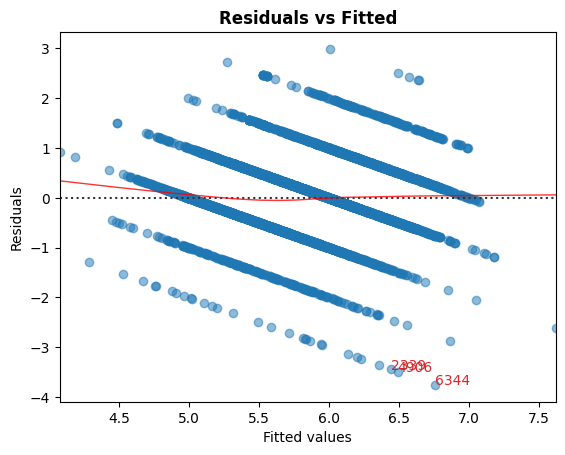

In [ ]:
cls.residual_plot()

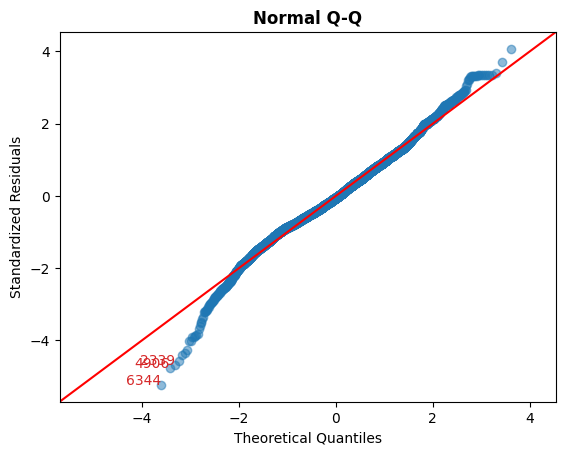

In [ ]:
cls.qq_plot()

In [276]:
cls.vif_table()

,Features,VIF Factor
0,const,1.00
10,sulphates,1.54
3,citric_acid,1.61
5,chlorides,1.63
2,volatile_acidity,1.95
6,free_sulfur_dioxide,2.14
9,pH,2.54
7,total_sulfur_dioxide,2.94
11,alcohol,4.78
1,fixed_acidity,4.90
